# ACV LAB - 4
## SHASHWAT JAIN | E22CSEU0314

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



image = cv2.imread("pic.png")
color_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

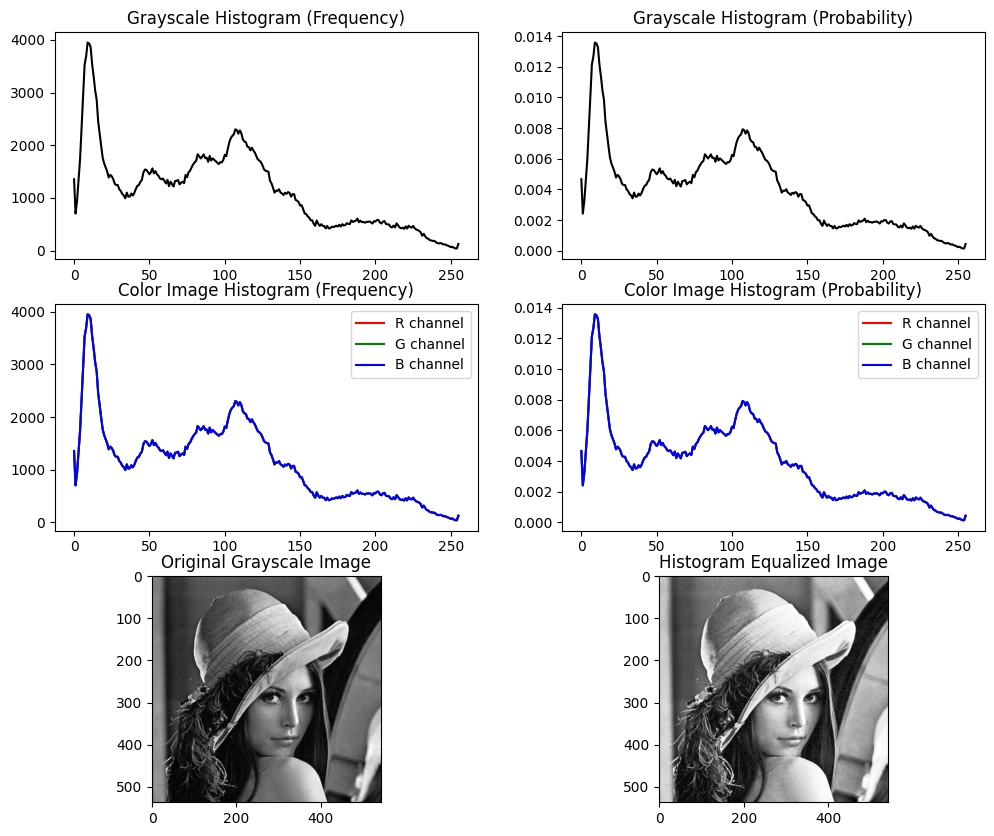

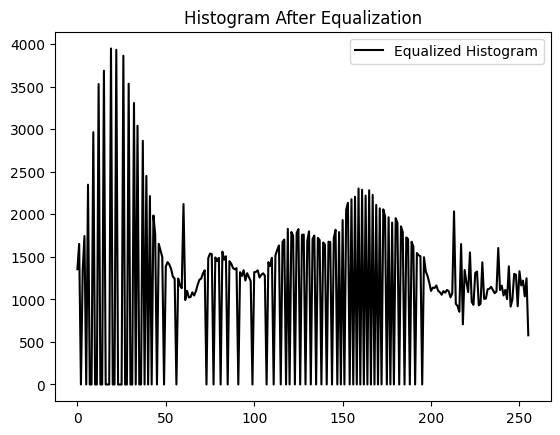

In [2]:

def compute_histogram(image, channels):
    hist = [cv2.calcHist([image], [ch], None, [256], [0, 256]) for ch in channels]
    return hist


gray_hist = compute_histogram(gray_image, [0])[0]


color_hist = compute_histogram(image, [0, 1, 2])  


gray_hist_prob = gray_hist / gray_hist.sum()
color_hist_prob = [h / h.sum() for h in color_hist]


fig, axs = plt.subplots(3, 2, figsize=(12, 10))


axs[0, 0].plot(gray_hist, color='black')
axs[0, 0].set_title("Grayscale Histogram (Frequency)")
axs[0, 1].plot(gray_hist_prob, color='black')
axs[0, 1].set_title("Grayscale Histogram (Probability)")


colors = ['r', 'g', 'b']
for i, (hist, color) in enumerate(zip(color_hist, colors)):
    axs[1, 0].plot(hist, color=color, label=f'{color.upper()} channel')
axs[1, 0].set_title("Color Image Histogram (Frequency)")
axs[1, 0].legend()


for i, (hist, color) in enumerate(zip(color_hist_prob, colors)):
    axs[1, 1].plot(hist, color=color, label=f'{color.upper()} channel')
axs[1, 1].set_title("Color Image Histogram (Probability)")
axs[1, 1].legend()


equalized_gray = cv2.equalizeHist(gray_image)
equalized_hist = compute_histogram(equalized_gray, [0])[0]

axs[2, 0].imshow(gray_image, cmap='gray')
axs[2, 0].set_title("Original Grayscale Image")
axs[2, 1].imshow(equalized_gray, cmap='gray')
axs[2, 1].set_title("Histogram Equalized Image")

plt.show()



plt.plot(equalized_hist, color='black', label="Equalized Histogram")
plt.legend()
plt.title("Histogram After Equalization")
plt.show()

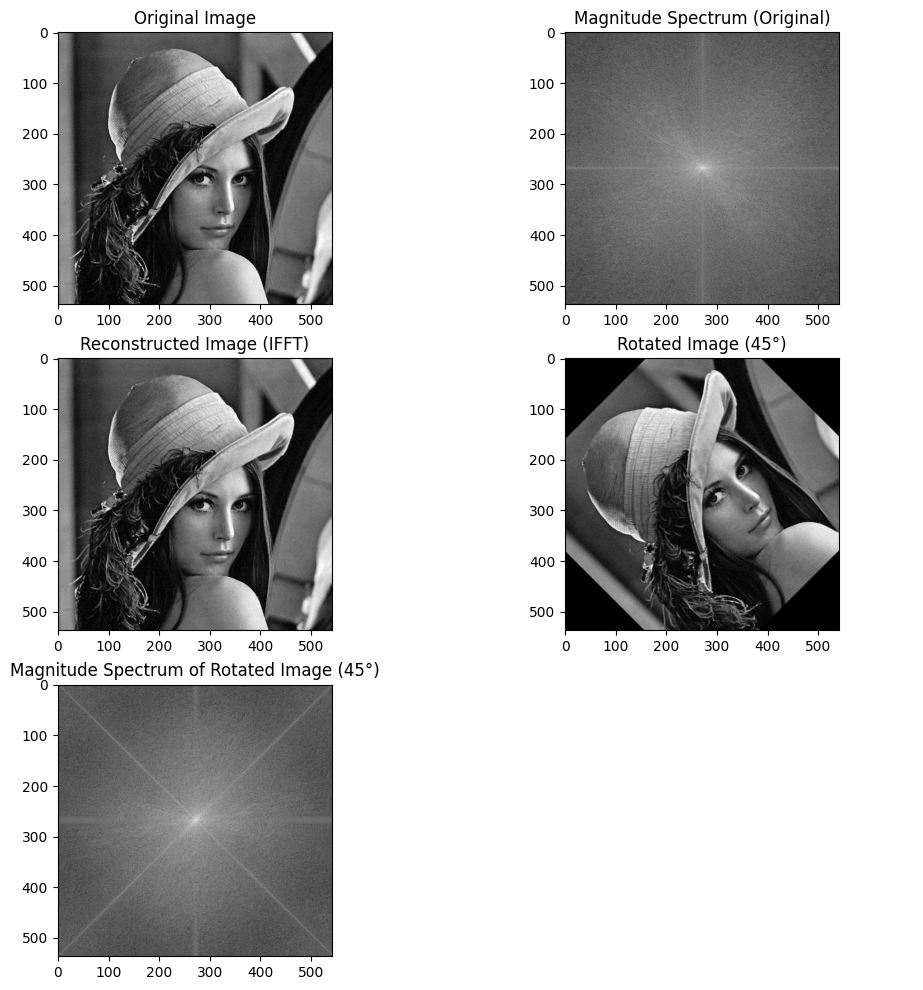

In [ ]:
def compute_fft(image):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(np.abs(dft_shift) + 1)
    return dft, dft_shift, magnitude_spectrum

# Low freq == smooth areas, high freq == edges



def compute_ifft(dft):
    dft_ishift = np.fft.ifftshift(dft)
    img_reconstructed = np.fft.ifft2(dft_ishift)  
    img_reconstructed = np.abs(img_reconstructed) 
    return img_reconstructed


dft, dft_shift, magnitude_spectrum = compute_fft(gray_image)


reconstructed_image = compute_ifft(dft_shift)


angle = 45
(h, w) = gray_image.shape[:2]
center = (w // 2, h // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(gray_image, rotation_matrix, (w, h))


_, rotated_dft_shift, rotated_magnitude_spectrum = compute_fft(rotated_image)


fig, axs = plt.subplots(3, 2, figsize=(12, 12))


axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(magnitude_spectrum, cmap='gray')
axs[0, 1].set_title("Magnitude Spectrum (Original)")


axs[1, 0].imshow(reconstructed_image, cmap='gray')
axs[1, 0].set_title("Reconstructed Image (IFFT)")
axs[1, 1].imshow(rotated_image, cmap='gray')
axs[1, 1].set_title(f"Rotated Image ({angle}°)")


axs[2, 0].imshow(rotated_magnitude_spectrum, cmap='gray')
axs[2, 0].set_title(f"Magnitude Spectrum of Rotated Image ({angle}°)")
axs[2, 1].axis("off")  


plt.show()